In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math

#Resolução do circuito abaixo:

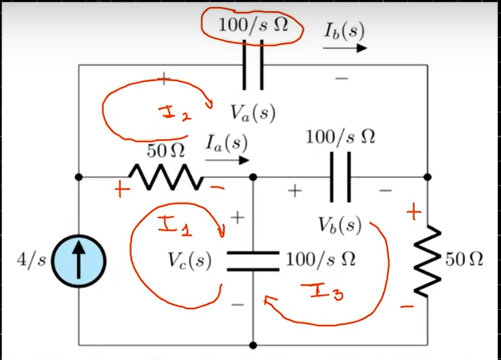

In [ ]:
#Definições iniciais
I1, I2, I3, s, t =  sp.symbols('I1, I2, I3, s, t')

eq0 = sp.Eq(I1, 4/s)

eq1 = sp.Eq((100*I2)/s - 100/s*(I3-I2) - 50*(4/s - I2), 0)

eq2 = sp.Eq(-100/s*(4/s - I3) + 100/s*(I3 - I2) + 50*I3 , 0)


In [ ]:
#Resolvendo o sistema
solucao = sp.solve([eq1, eq2], [I2, I3], dict=True)

I1 = 4/s
I2 = solucao[0][I2]
I3 = solucao[0][I3]

print('As correntes de malha no domínio de Laplace são:')
print()
display(sp.Eq(sp.symbols('I_{1}(s)'), 4/s))
print()
display(sp.Eq(sp.symbols('I_{2}(s)'), I2))
print()
display(sp.Eq(sp.symbols('I_{3}(s)'), I3))

As correntes de malha no domínio de Laplace são:



           4
I_{1}(s) = ─
           s

           4⋅s + 8 
I_{2}(s) = ────────
            2      
           s  + 6⋅s

              16   
I_{3}(s) = ────────
            2      
           s  + 6⋅s

In [ ]:
#Determiando as correntes desejadas
Ia, Ib = sp.symbols('Ia, Ib')

Ia = I1 - I2
Ib = I2

display(sp.Eq(sp.symbols('I_{a}(s)'), sp.simplify(Ia)))
print()
display(sp.Eq(sp.symbols('I_{b}(s)'), Ib))

               16   
I_{a}(s) = ─────────
           s⋅(s + 6)

           4⋅s + 8 
I_{b}(s) = ────────
            2      
           s  + 6⋅s

In [ ]:
#Calculando a expansão e a inversa de Laplace

display(sp.Eq(sp.symbols('I_{a}(s)'), sp.apart(Ia)))
print()
display(sp.Eq(sp.symbols('I_{b}(s)'), sp.apart(Ib)))

print('\nAs correntes no domínio do tempo são:\n')

ia = sp.inverse_laplace_transform(Ia, s, t)
ib = sp.inverse_laplace_transform(Ib, s, t)

display(sp.Eq(sp.symbols('i_{a}(t)'), ia))
print()
display(sp.Eq(sp.symbols('i_{b}(t)'), ib))

                 8        8 
I_{a}(s) = - ───────── + ───
             3⋅(s + 6)   3⋅s

               8        4 
I_{b}(s) = ───────── + ───
           3⋅(s + 6)   3⋅s


As correntes no domínio do tempo são:



                       -6⋅t     
           8⋅θ(t)   8⋅ℯ    ⋅θ(t)
i_{a}(t) = ────── - ────────────
             3           3      

                       -6⋅t     
           4⋅θ(t)   8⋅ℯ    ⋅θ(t)
i_{b}(t) = ────── + ────────────
             3           3      

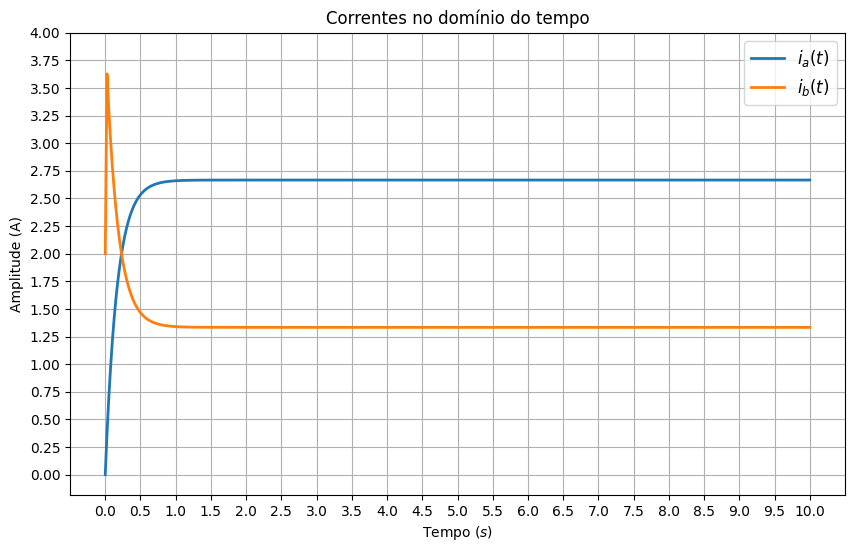

In [ ]:
# Funções lambdify para converter as expressões simbólicas em funções numéricas
ia_num = sp.lambdify(t, ia, 'numpy')
ib_num = sp.lambdify(t, ib, 'numpy')

# Intervalo de tempo para o plot
t_num = np.linspace(0, 10, 400)

# Calcular os valores das funções
ia_num = ia_num(t_num)
ib_num = ib_num(t_num)

plt.figure(figsize=(10, 6))
plt.plot(t_num, ia_num, label=r'$i_a(t)$', linewidth=2)
plt.plot(t_num, ib_num, label=r'$i_b(t)$', linewidth=2)
plt.title('Correntes no domínio do tempo')
plt.xlabel('Tempo ($s$)')
plt.ylabel('Amplitude (A)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.yticks(np.arange(0, max(ib_num)+0.5, step=0.25))
plt.xticks(np.arange(min(t_num), max(t_num)+0.5, step=0.5))
plt.show()

#Obs.:
É interessante notar que, diferentemente de circuitos com fontes de corrente ou tensão senoidas, o quais na graduação é visto apenas sua análise em regime permanente, em circuitos com fontes continuas é possível analisar o regime transitório e permanente. A corrente $i_b$, que flui no ramo que tem um capacitor, tem uma uma sobrecorrente durante o regime transitório e estabiliza em regime permanente. Analisar o regime transitório é importante para dimensionar correntamente os componentes do circuito, pois componentes subdimensionados podem não suportar esses picos de corrente, mesmo que o regime transitório dure um curto período de tempo, para esse caso aproximadamente $600 ms$. A título de comparação o olho humano leva em média $400ms$ para piscar.

#Teorema do Valor Final
Aplica-se o Teorema do Valor Final nas expressões de $I_a(s)$ e $I_b(s)$ para verificar o comportamento dessas correntes no domínio do tempo a medida que $t \to ∞ $, isto é, o compatamento dessas correntes em regime permanente. Para esse caso, como já temos os gráficos indicando os valores das correntes em regime permanente, o teorema será utilizado para validar os dados. O teorema é dado por:

\begin{equation}
\lim_{t \to ∞}i(t) = \lim_{s \to 0}sI(s).
\end{equation}

In [ ]:
#Uso do Teorema do Valor Final

print('O valores em regime permanete são:\n')
display(sp.Eq(sp.symbols('i_{a}(\infty)'), sp.limit(s*Ia, s, 0)))
print()
display(sp.Eq(sp.symbols('i_{b}(\infty)'), sp.limit(s*Ib, s, 0)))

O valores em regime permanete são:



i_{a}(\infty) = 8/3

i_{b}(\infty) = 4/3

#Simulação
Em especial, para a corrente $i_b(t)$ foi realizado uma simulação no software Falstad. Os resultados vão de encontro com a teoria, a imagem abaixo mostra o valor da corrente $i_b(t)$ em regime permanente.

Link de acesso: https://tinyurl.com/2cda2jp7

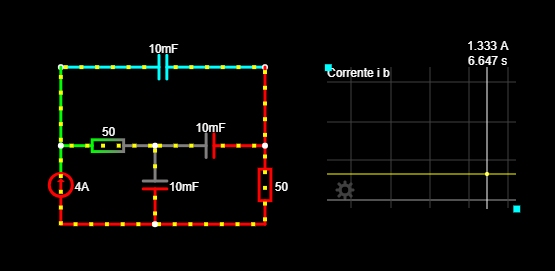